In [1]:
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

import itertools

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 머신러닝
from sklearn import datasets, metrics

from sklearn import svm, neighbors, tree
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, \
confusion_matrix

from sklearn.preprocessing import StandardScaler, MinMaxScaler, \
RobustScaler, Normalizer

In [2]:
rawData = pd.read_csv('./data/titanic_full_data.csv')

In [3]:
target = rawData[['Survived']]

In [4]:
target.head()

,Survived
0,0
1,1
2,1
3,1
4,0


- 모든 변수는 Y를 예측하기 위한 설명변수로써, 사용할 수 있지만
- 수업시간에는 전처리를 최소화 하는 방향으로 진행

In [5]:
rawData.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [6]:
columns = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
features = rawData[columns]

In [7]:
features.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S


# 전처리

1. 범주형 변수
- 더미 변수로 변경(Pclass, Sex, Embarked)

2. 연속형 변수
- 스케일링
- 범주형 변수 변경 가능

## 결측치 
- 결측치가 있는 데이터는 제거하거나, 
- 다른 값으로 채워주거나

In [8]:
features.isna().sum()

Pclass        0
Sex           0
Age         255
SibSp         0
Parch         0
Fare          1
Embarked      2
dtype: int64

### Age 변수에 대한 결측치 처리 
- 평균으로 대체

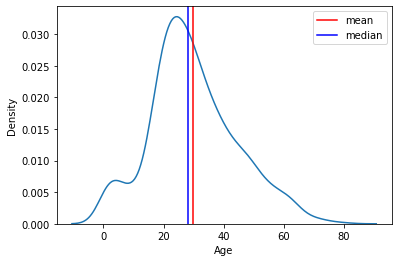

In [10]:
sns.kdeplot(features.Age)
plt.axvline(x=features.Age.mean(), color='r', label='mean')
plt.axvline(x=features.Age.median(), color='b', label='median')
# plt.axvline(x=mode(features.Age)[0][0], color='g', label='mode')
plt.legend()
plt.show()

In [11]:
features['Age'].fillna(features['Age'].mean(), inplace=True)

In [12]:
features['Age'].isna().sum()

0

### Fare 변수에 대한 결측치 처리 
- 제거

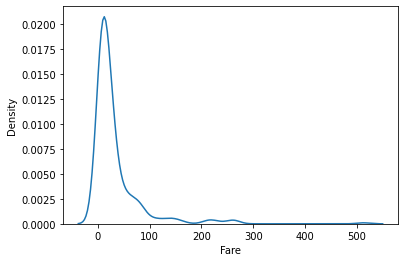

In [13]:
sns.kdeplot(features.Fare)
# plt.axvline(x=features.Age.mean(), color='r', label='mean')
# plt.axvline(x=features.Age.median(), color='b', label='median')
# plt.axvline(x=mode(features.Age)[0][0], color='g', label='mode')
# plt.legend()
plt.show()

In [14]:
# features.dropna(subset=['Fare'], inplace=True)
drop_idx = features.loc[features['Fare'].isna()].index

In [15]:
features.drop(index=drop_idx, inplace=True)

In [16]:
target.drop(index=drop_idx, inplace=True)

In [17]:
features['Fare'].isna().sum()

0

### Embarked 변수에 대한 결측치 처리 
- 최빈값으로 대체 

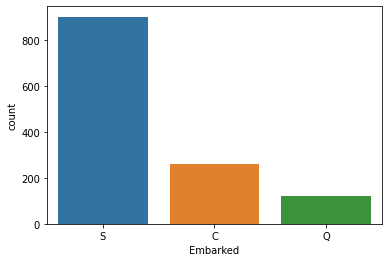

In [18]:
sns.countplot(features.Embarked)
plt.show()

In [19]:
features['Embarked'].fillna('S', inplace=True)

In [20]:
features['Embarked'].isna().sum()

0

In [21]:
features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1284 entries, 0 to 1284
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    1284 non-null   int64  
 1   Sex       1284 non-null   object 
 2   Age       1284 non-null   float64
 3   SibSp     1284 non-null   int64  
 4   Parch     1284 non-null   int64  
 5   Fare      1284 non-null   float64
 6   Embarked  1284 non-null   object 
dtypes: float64(2), int64(3), object(2)
memory usage: 112.5+ KB


## 범주형 변수에 대한 전처리

### 더미변수

In [22]:
features.columns

Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked'], dtype='object')

In [23]:
dummy_columns = ['Pclass', 'Sex', 'Embarked']
for col in dummy_columns:
    dummies = pd.get_dummies(features[col], prefix=col)
    features = pd.concat([features, dummies], axis=1)

In [24]:
features.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,male,22.0,1,0,7.2500,S,0,0,1,0,1,0,0,1
1,1,female,38.0,1,0,71.2833,C,1,0,0,1,0,1,0,0
2,3,female,26.0,0,0,7.9250,S,0,0,1,1,0,0,0,1
3,1,female,35.0,1,0,53.1000,S,1,0,0,1,0,0,0,1
4,3,male,35.0,0,0,8.0500,S,0,0,1,0,1,0,0,1


In [25]:
features.drop(columns=['Pclass', 'Sex', 'Embarked'], inplace=True)

In [26]:
features.head()

,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,22.0,1,0,7.2500,0,0,1,0,1,0,0,1
1,38.0,1,0,71.2833,1,0,0,1,0,1,0,0
2,26.0,0,0,7.9250,0,0,1,1,0,0,0,1
3,35.0,1,0,53.1000,1,0,0,1,0,0,0,1
4,35.0,0,0,8.0500,0,0,1,0,1,0,0,1


### 연속형 변수의 더미화

In [27]:
features.Age.max()

80.0

In [28]:
labels = ['kids', '10s', '20s', '30s', '40s', '50s', 'senior']
bins = [0, 10, 20, 30, 40, 50, 60, 80]
ages = pd.cut(features['Age'], bins=bins, labels=labels)
dummies = pd.get_dummies(ages)
features = pd.concat([features, dummies], axis=1)

In [29]:
features.drop(columns=['Age'], inplace=True)

In [30]:
features.head()

,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,kids,10s,20s,30s,40s,50s,senior
0,1,0,7.2500,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0
1,1,0,71.2833,1,0,0,1,0,1,0,0,0,0,0,1,0,0,0
2,0,0,7.9250,0,0,1,1,0,0,0,1,0,0,1,0,0,0,0
3,1,0,53.1000,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0
4,0,0,8.0500,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0


## 연속형 변수의 전처리

### 스케일링
- standard scaler: 평균을 0으로 분산을 1로 하는 스케일링
- minmax scaler: 최소값을 0으로 최대값을 1로 스케일링

In [31]:
scaler = StandardScaler()
features[['Fare', 'SibSp', 'Parch']] = \
    scaler.fit_transform(features[['Fare', 'SibSp', 'Parch']])

In [32]:
features.head()

,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,kids,10s,20s,30s,40s,50s,senior
0,0.475482,-0.439034,-0.504315,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0
1,0.475482,-0.439034,0.723665,1,0,0,1,0,1,0,0,0,0,0,1,0,0,0
2,-0.478454,-0.439034,-0.491371,0,0,1,1,0,0,0,1,0,0,1,0,0,0,0
3,0.475482,-0.439034,0.374960,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0
4,-0.478454,-0.439034,-0.488973,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0


### 스케일링 복구

In [33]:
scaler.inverse_transform(features[['Fare', 'SibSp', 'Parch']])

array([[ 7.25  ,  1.    ,  0.    ],
       [71.2833,  1.    ,  0.    ],
       [ 7.925 ,  0.    ,  0.    ],
       ...,
       [ 7.25  ,  0.    ,  0.    ],
       [ 8.05  ,  0.    ,  0.    ],
       [22.3583,  1.    ,  1.    ]])

# SVM(Support Vector Machine)

## 데이터 셋의 분리

In [34]:
train_x, test_x, train_y, test_y = train_test_split(features, target, train_size=0.8, random_state=123)

## SVC(Support Vector Classifier)

In [ ]:
param = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100]
}
# svm_model = svm.SVC(kernel='linear', C=1).fit(train_x, train_y)
grid_search = GridSearchCV(svm.SVC(kernel='linear'), param, cv=5)
grid_search.fit(train_x, train_y)

In [45]:
grid_search.best_params_

AttributeError: 'GridSearchCV' object has no attribute 'best_params_'

In [39]:
yhat = svm_model.predict(test_x)

In [40]:
cmat = confusion_matrix(test_y, yhat)
cmat

array([[138,  23],
       [ 27,  69]])

In [42]:
acc=(cmat[0,0] + cmat[1,1])/np.sum(cmat)
acc

0.8054474708171206

In [43]:
roc_auc_score(test_y, yhat)

0.7879464285714286